## Exploratory Data Analysis and Feature Engineering on Black Friday Dataset
Link for the Dataset: https://www.kaggle.com/datasets/sdolezel/black-friday

## Cleaning and Preparing Data for Model Training

In [166]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [167]:
#Importing the train Data set
df_train=pd.read_csv("blackfridaytrain.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [168]:
#Importing the test Data set
df_test=pd.read_csv("blackfridaytest.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [169]:
df= pd.concat([df_train,df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [171]:
df.drop(['User_ID'],axis=1,inplace=True)

In [172]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [173]:
df.nunique()

Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [174]:
df['Gender']=df['Gender'].map({'M':0,'F':1})

In [175]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [176]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [177]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0


In [178]:
## Using Label Encoding
from sklearn. preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Age']=encoder.fit_transform(df['Age'])
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,6,16,C,4+,0,8,NaN,NaN,7969.0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 65.8+ MB


In [180]:
df= pd.get_dummies(df, columns=['City_Category', 'Stay_In_Current_City_Years'], drop_first=True, dtype=int)

In [181]:
df.head()

,Product_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,P00069042,1,0,10,0,3,NaN,NaN,8370.0,0,0,0,1,0,0
1,P00248942,1,0,10,0,1,6.0,14.0,15200.0,0,0,0,1,0,0
2,P00087842,1,0,10,0,12,NaN,NaN,1422.0,0,0,0,1,0,0
3,P00085442,1,0,10,0,12,14.0,NaN,1057.0,0,0,0,1,0,0
4,P00285442,0,6,16,0,8,NaN,NaN,7969.0,0,1,0,0,0,1


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Product_ID                     783667 non-null  object 
 1   Gender                         783667 non-null  int64  
 2   Age                            783667 non-null  int64  
 3   Occupation                     783667 non-null  int64  
 4   Marital_Status                 783667 non-null  int64  
 5   Product_Category_1             783667 non-null  int64  
 6   Product_Category_2             537685 non-null  float64
 7   Product_Category_3             237858 non-null  float64
 8   Purchase                       550068 non-null  float64
 9   City_Category_B                783667 non-null  int32  
 10  City_Category_C                783667 non-null  int32  
 11  Stay_In_Current_City_Years_1   783667 non-null  int32  
 12  Stay_In_Current_City_Years_2  

## Second Method Using One-Hot Encoding
1. from sklearn.preprocessing import OneHotEncoder
2. encoder=OneHotEncoder(sparse_output=False)
3. encoded_data= encoder.fit_transform(df[['City_Category','Stay_In_Current_City_Years']])
4. encoded_df=pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['City_Category','Stay_In_Current_City_Years']))
5. df= pd.concat([df,encoded_df], axis=1)
6. df.drop(['City_Category','Stay_In_Current_City_Years'], axis=1, inplace=True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Product_ID                     783667 non-null  object 
 1   Gender                         783667 non-null  int64  
 2   Age                            783667 non-null  int64  
 3   Occupation                     783667 non-null  int64  
 4   Marital_Status                 783667 non-null  int64  
 5   Product_Category_1             783667 non-null  int64  
 6   Product_Category_2             537685 non-null  float64
 7   Product_Category_3             237858 non-null  float64
 8   Purchase                       550068 non-null  float64
 9   City_Category_B                783667 non-null  int32  
 10  City_Category_C                783667 non-null  int32  
 11  Stay_In_Current_City_Years_1   783667 non-null  int32  
 12  Stay_In_Current_City_Years_2  

In [184]:
df.isnull().sum()

Product_ID                            0
Gender                                0
Age                                   0
Occupation                            0
Marital_Status                        0
Product_Category_1                    0
Product_Category_2               245982
Product_Category_3               545809
Purchase                         233599
City_Category_B                       0
City_Category_C                       0
Stay_In_Current_City_Years_1          0
Stay_In_Current_City_Years_2          0
Stay_In_Current_City_Years_3          0
Stay_In_Current_City_Years_4+         0
dtype: int64

In [185]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [186]:
## For Categorical Features replace the NAN values with mode
## Filling with mean will create a new unique value inside the column

df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [187]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [188]:
df['Product_Category_3']= df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [189]:
df.isnull().sum()

Product_ID                            0
Gender                                0
Age                                   0
Occupation                            0
Marital_Status                        0
Product_Category_1                    0
Product_Category_2                    0
Product_Category_3                    0
Purchase                         233599
City_Category_B                       0
City_Category_C                       0
Stay_In_Current_City_Years_1          0
Stay_In_Current_City_Years_2          0
Stay_In_Current_City_Years_3          0
Stay_In_Current_City_Years_4+         0
dtype: int64

In [190]:
df['Purchase'].unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

In [191]:
## Replacing the NAN values with Mean as there are more than 18K Unique values
df['Purchase']= df['Purchase'].fillna(df['Purchase'].mean())

In [192]:
df.isnull().sum()

Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
City_Category_B                  0
City_Category_C                  0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [193]:
df

,Product_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,P00069042,1,0,10,0,3,8.0,16.0,8370.000000,0,0,0,1,0,0
1,P00248942,1,0,10,0,1,6.0,14.0,15200.000000,0,0,0,1,0,0
2,P00087842,1,0,10,0,12,8.0,16.0,1422.000000,0,0,0,1,0,0
3,P00085442,1,0,10,0,12,14.0,16.0,1057.000000,0,0,0,1,0,0
4,P00285442,0,6,16,0,8,8.0,16.0,7969.000000,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,1,2,15,1,8,8.0,16.0,9263.968713,1,0,0,0,0,1
783663,P00254642,1,2,15,1,5,8.0,16.0,9263.968713,1,0,0,0,0,1
783664,P00031842,1,2,15,1,1,5.0,12.0,9263.968713,1,0,0,0,0,1
783665,P00124742,1,4,1,0,10,16.0,16.0,9263.968713,0,1,0,0,0,1


## Visualization

<Axes: xlabel='Age', ylabel='Purchase'>

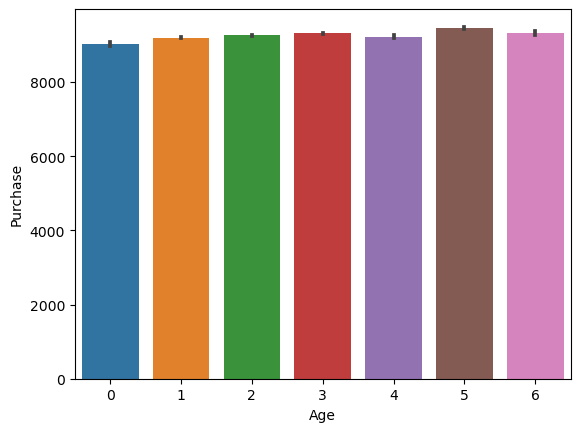

In [204]:
sns.barplot(x='Age', y='Purchase', data = df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

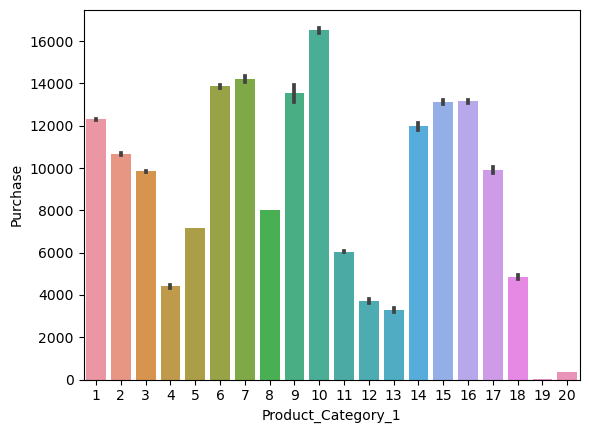

In [205]:
sns.barplot(x='Product_Category_1',y='Purchase', data=df)

In [ ]:
## 

## Feature Scaling

In [203]:
from sklearn.model_selection import train_test_split

In [213]:
x=df.drop(['Purchase', 'Product_ID'],axis=1)
y=df['Purchase']

In [214]:
X_train, x_test, Y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=36)

In [215]:
X_train

,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
488145,0,2,20,0,1,8.0,17.0,0,1,0,0,0,1
232654,0,2,17,1,1,16.0,16.0,0,1,1,0,0,0
83937,0,5,11,0,8,8.0,16.0,1,0,0,0,0,1
381107,1,1,4,0,5,11.0,16.0,1,0,1,0,0,0
15890,1,3,14,1,1,8.0,16.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459738,0,5,1,1,8,8.0,16.0,0,1,0,0,1,0
222458,0,3,16,0,18,8.0,16.0,0,0,0,0,0,0
138401,0,3,1,1,5,14.0,16.0,1,0,0,0,1,0
183208,0,3,7,0,1,2.0,9.0,1,0,0,1,0,0


In [217]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
x_test=scalar.transform(x_test)

C:\Users\DYAVADI\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
